## Make the label of cell in Kevin's format
- if cell doesn't divide, label be consistent through frames
- if cell divide, sisters have new adjacent labels

In [ ]:
from bactrack.core import compute_hierarchy
dir = "/Users/sherryyang/Documents/wiggins-lab/debug_phase"
hier_arr = compute_hierarchy(dir, submodel= 'bact_phase_omni')

import bactrack.core as core
nodes, edges = core.run_tracking(hier_arr, solver_name = 'mip_solver')

In [46]:
import bactrack.io as io
masks, edges_df =  io.format_output(hier_arr, nodes, edges, label_format = "kevin")

In [47]:
import pandas as pd
hier_df = io.hiers_to_df(hier_arr)
merged_df = pd.merge(edges_df, hier_df.add_suffix('_source'), left_on='Source Index', right_on='index_source', how='left')
merged_df = pd.merge(merged_df, hier_df.add_suffix('_target'), left_on='Target Index', right_on='index_target', how='left')

In [48]:
filtered_df = merged_df[["label_source", "label_target"]].astype(int)

# Kevin's txt file only need record division information, so filter them out 
result = filtered_df[filtered_df["label_source"] != filtered_df["label_target"]] 
result.head(10)

,label_source,label_target
34,1,2
35,1,3
57,2,4
58,2,5
63,3,6
64,3,7
103,4,8
104,4,9
106,5,10
107,5,11


Output to txt file 

In [49]:
import pandas as pd
import csv

output_file = 'output.txt' # change this
result.to_csv(output_file, header=False, index=False, sep=',', quoting=csv.QUOTE_NONE)


You could also check the pants in below:

In [ ]:
# Install napari if you haven't
! pip install napari

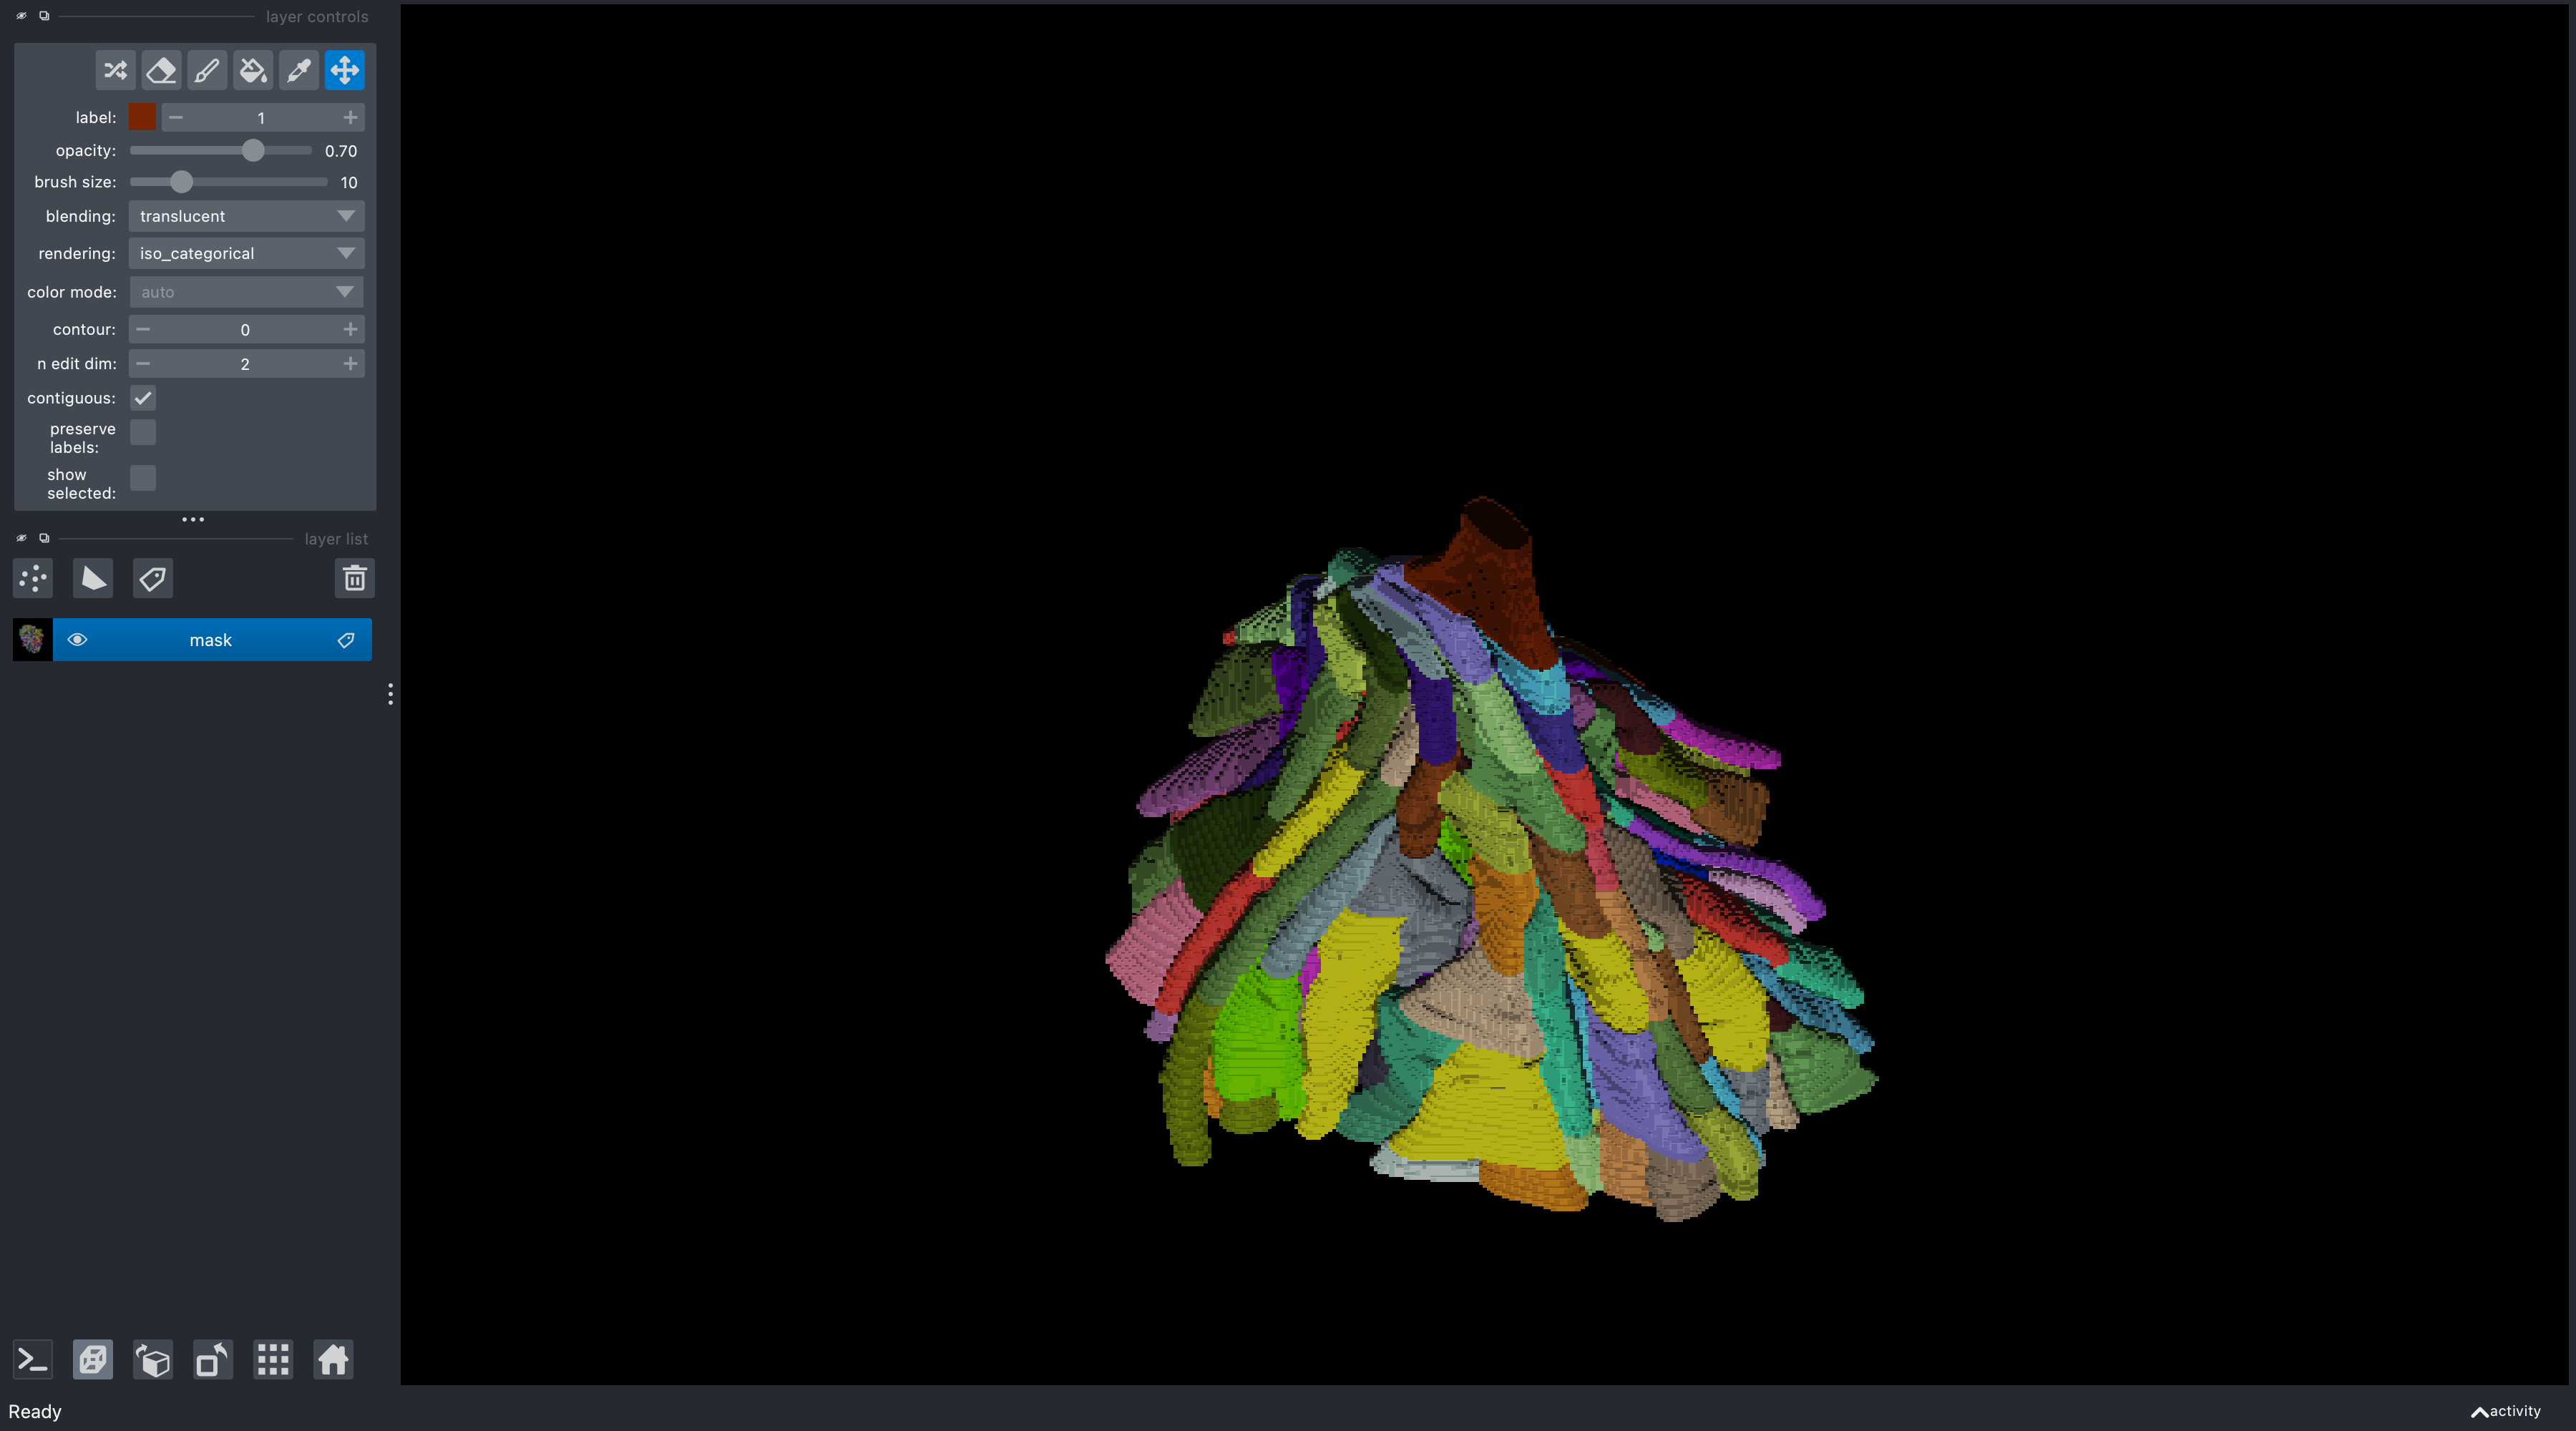

In [51]:

import napari
from napari.utils.notebook_display import nbscreenshot
import numpy as np

masks_int = [mask.astype(np.uint32) for mask in masks]
masks_3d = np.stack(masks_int, axis=0)

viewer = napari.Viewer()
viewer.window.resize(1800, 1000)
layers = viewer.add_labels(masks_3d, name="mask")
viewer.dims.ndisplay = 3
viewer.camera.angles=(-180,0,45)
display(nbscreenshot(viewer))